In [96]:
import pandas as pd
from atom import ATOMClassifier
from atom import ATOMLoader
from numpy import sqrt
from numpy import argmax
import numpy as np
from sklearn.metrics import roc_auc_score, auc, roc_curve, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from scipy import interp

In [107]:
X = pd.read_csv("/path/to/csv.csv", index_col = 0)

X['y'] = [0 if row_name.endswith('H') else 1 for row_name in X.index]

In [108]:
X.head(5)

,CVVSDRGSTLGRLYF,CAVNQAGTALIF,CAVNTGNQFYF,CAVMDSSYKLIF,CAVNTGFQKLVF,CAENSGGSNYKLTF,CAVNDYKLSF,CAVRDSNYQLIW,CAVMDSNYQLIW,CAVSGGSNYKLTF,...,CASSLADTQYF,CASSLAGTDTQYF,CASSLDFYEQYF,CASSLGSYEQYF,CATDAGGTSYGKLTF,CAVFTSGTYKYIF,CAVGGYQKVTF,CAVGSGGGADGLTF,CAVGSGNTPLVF,y
1_A_B_H,0.000122,0.000081,0.000041,0.000081,0.000041,0.000163,0.000041,0.000000,0.0,0.000000,...,0.000041,0.000000,0.0,0.000041,0.000000,0.000000,0.000000,0.000000,0.000000,0
10_A_B_H,0.000081,0.000041,0.000041,0.000000,0.000081,0.000041,0.000204,0.000000,0.0,0.000041,...,0.000041,0.000041,0.0,0.000000,0.000041,0.000000,0.000081,0.000000,0.000041,0
11_A_B_H,0.000204,0.000122,0.000122,0.000041,0.000041,0.000000,0.000163,0.000000,0.0,0.000122,...,0.000081,0.000041,0.0,0.000041,0.000000,0.000000,0.000041,0.000000,0.000000,0
12_A_B_BC,0.000000,0.000163,0.000122,0.000163,0.000244,0.000163,0.000000,0.000122,0.0,0.000122,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000041,0.000041,0.000041,1
12_A_B_H,0.000122,0.000041,0.000081,0.000000,0.000000,0.000122,0.000041,0.000000,0.0,0.000041,...,0.000081,0.000041,0.0,0.000081,0.000041,0.000081,0.000000,0.000000,0.000000,0


In [110]:
X.shape

(94, 601)

SFM from 600 to 10 features


In [111]:
solvers = ["LDA", "XGB", "LR", "LGB"]
models = ["GBM", "LR", "LDA", "QDA", "RNN", "AdaB", "RF", "XGB"] # "KNN", "SGD", "LGB"

atom = ATOMClassifier(X, y="y", test_size=0.25, verbose=2, warnings=False, random_state = 1, index=True)

for solver in solvers:
    atom.branch = "sfm" + solver + "_from_master"
    atom.feature_selection(strategy="SFM", solver=solver, n_features=10, random_state=0)
        
    models_named = [model + "_" + solver for model in models]
    atom.run(models=models_named, n_calls=50, n_initial_points=10, metric="AUC", n_bootstrap=5)

    atom.save("atom_sfm_600_BC_2", save_data=False)
        

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (94, 601)
Memory: 458.10 kB
Scaled: False
Outlier values: 851 (2.0%)
-------------------------------------
Train set size: 71
Test set size: 23
-------------------------------------
|   |    dataset |      train |       test |
| - | ---------- | ---------- | ---------- |
| 0 |   49 (1.1) |   37 (1.1) |   12 (1.1) |
| 1 |   45 (1.0) |   34 (1.0) |   11 (1.0) |

New branch sfmLDA successfully created.
Fitting FeatureSelector...
Performing feature selection ...
 --> The LinearDiscriminantAnalysis estimator selected 10 features from the dataset.
   >>> Dropping feature CVVSDRGSTLGRLYF.
   >>> Dropping feature CAVNQAGTALIF.
   >>> Dropping feature CAVNTGNQFYF.
   >>> Dropping feature CAVMDSSYKLIF.
   >>> Dropping feature CAVNTGFQKLVF.
   >>> Dropping feature CAENSGGSNYKLTF.
   >>> Dropping feature CAVNDYKLSF.
   >>> Dropping feature CAVRDSNYQLIW.
   >>> Dropp

In [ ]:
atom = ATOMLoader("atom_sfm_600_BC_2", data = (X,"y")) 
atom.branch = "master"

Transforming data for branch sfmLDA:
Performing feature selection ...
 --> The LinearDiscriminantAnalysis estimator selected 10 features from the dataset.
   >>> Dropping feature CVVSDRGSTLGRLYF.
   >>> Dropping feature CAVNQAGTALIF.
   >>> Dropping feature CAVNTGNQFYF.
   >>> Dropping feature CAVMDSSYKLIF.
   >>> Dropping feature CAVNTGFQKLVF.
   >>> Dropping feature CAENSGGSNYKLTF.
   >>> Dropping feature CAVNDYKLSF.
   >>> Dropping feature CAVRDSNYQLIW.
   >>> Dropping feature CAVMDSNYQLIW.
   >>> Dropping feature CAVSGGSNYKLTF.
   >>> Dropping feature CAVNTNAGKSTF.
   >>> Dropping feature CAANFGNEKLTF.
   >>> Dropping feature CAVNTGGFKTIF.
   >>> Dropping feature CAVSNDYKLSF.
   >>> Dropping feature CAVTGNQFYF.
   >>> Dropping feature CAAMDSNYQLIW.
   >>> Dropping feature CAVKDSNYQLIW.
   >>> Dropping feature CAVNSGGSNYKLTF.
   >>> Dropping feature CAVRDGDYKLSF.
   >>> Dropping feature CAENTGGFKTIF.
   >>> Dropping feature CAVLDSNYQLIW.
   >>> Dropping feature CAVNAGGTSYGKLTF.
   >

We can see that a different feature set was chosen for each solver:

In [116]:
solvers = ["LDA", "XGB", "LR", "LGB"]
branches = ["sfm" + solver for solver in solvers ]
for branch in branches:
    atom.branch = branch
    print(atom.features)

Switched to branch sfmLDA.
['CAADTGRRALTF', 'CASSLEETQYF', 'CASSLGQNTEAFF', 'CASSLQGNTEAFF', 'CASSLVGETQYF', 'CAVLYSSASKIIF', 'CAVMNYGGSQGNLIF', 'CAVRGGATNKLIF', 'CASSLYNEQFF', 'CASSLGSYEQYF']
Switched to branch sfmXGB.
['CAVRDSNYQLIW', 'CAVRDGDYKLSF', 'CAVNAGGTSYGKLTF', 'CAVSGNTPLVF', 'CADHQNYGGSQGNLIF', 'CAVRGGSQGNLIF', 'CALQGGSEKLVF', 'CAVRGFGNVLHC', 'CAVLTGTASKLTF', 'CAASEYGNKLVF']
Switched to branch sfmLR.
['CVVSDRGSTLGRLYF', 'CALSAARSSNTGKLIF', 'CADHQNYGGSQGNLIF', 'CAVEETSGSRLTF', 'CAATDSWGKLQF', 'CALQGGSEKLVF', 'CAASGAGSYQLTF', 'CAALYNFNKFYF', 'CAASEYGNKLVF', 'CAGHDYKLSF']
Switched to branch sfmLGB.
['CAVRDGDYKLSF', 'CAENTGGFKTIF', 'CAATTGYSTLTF', 'CAGTSGTYKYIF', 'CALQGGSEKLVF', 'CAVGSNDYKLSF', 'CAAETSGSRLTF', 'CALRMDSSYKLIF', 'CAVPSGNTPLVF', 'CAAYNQGGKLIF']


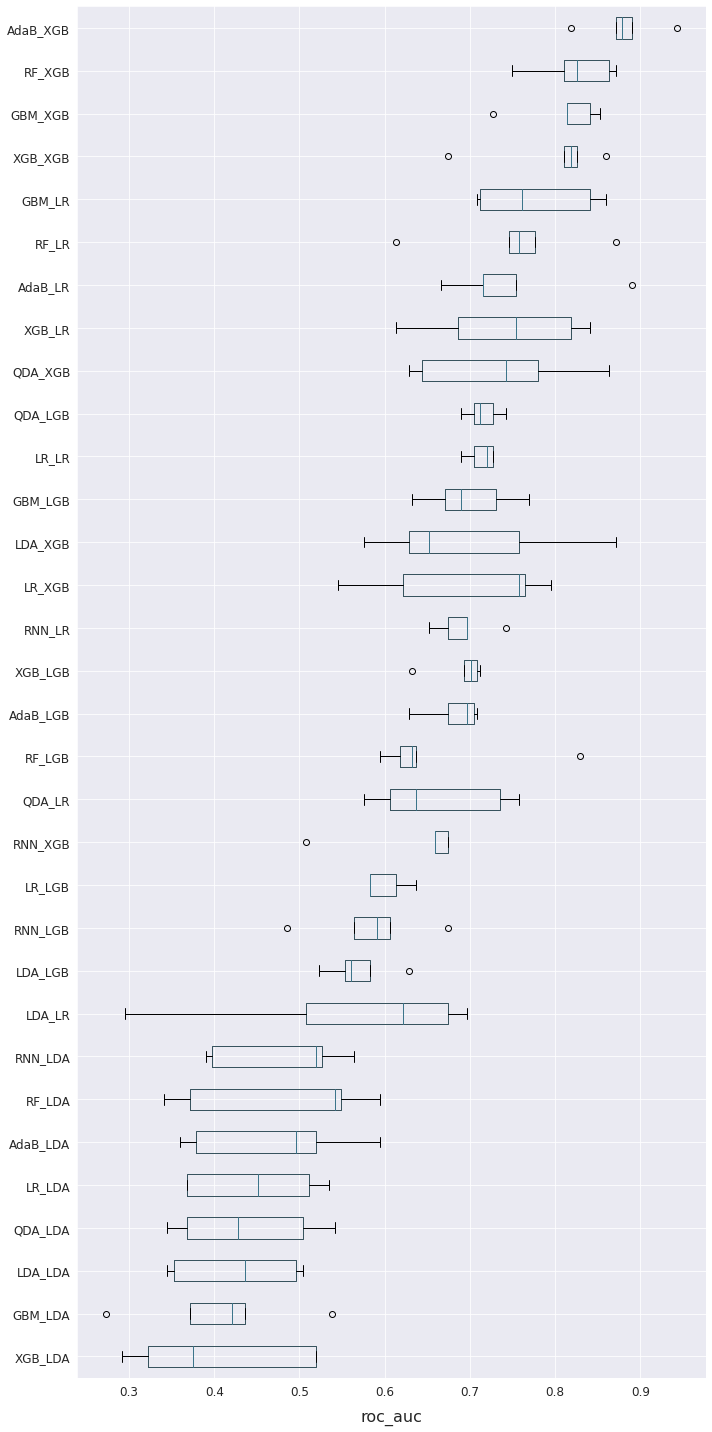

In [ ]:
atom.plot_results()

AUC of the winner model (AdaBoost) on test set:

In [161]:
atom.winner.metric_test

0.8787878787878789

Building on our previous experiences (other work in the lab), we added another step to the feature selection. 

We chose the ultimate number of features according to the highest average of auc on 9 different splits of the data.

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (94, 601)
Memory: 458.10 kB
Scaled: False
Outlier values: 851 (2.0%)
-------------------------------------
Train set size: 71
Test set size: 23
-------------------------------------
|   |    dataset |      train |       test |
| - | ---------- | ---------- | ---------- |
| 0 |   49 (1.1) |   37 (1.1) |   12 (1.1) |
| 1 |   45 (1.0) |   34 (1.0) |   11 (1.0) |

New branch sfmXGB_sfsLGB_3 successfully created.
Fitting FeatureSelector...
Performing feature selection ...
 --> The XGBClassifier estimator selected 10 features from the dataset.
   >>> Dropping feature CVVSDRGSTLGRLYF.
   >>> Dropping feature CAVNQAGTALIF.
   >>> Dropping feature CAVNTGNQFYF.
   >>> Dropping feature CAVMDSSYKLIF.
   >>> Dropping feature CAVNTGFQKLVF.
   >>> Dropping feature CAENSGGSNYKLTF.
   >>> Dropping feature CAVNDYKLSF.
   >>> Dropping feature CAVMDSNYQLIW.
   >>> Dropping 

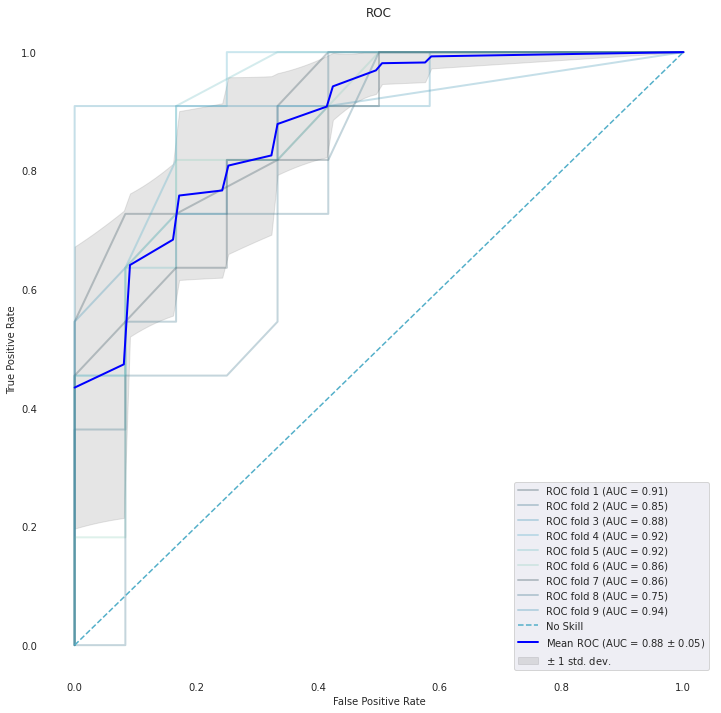

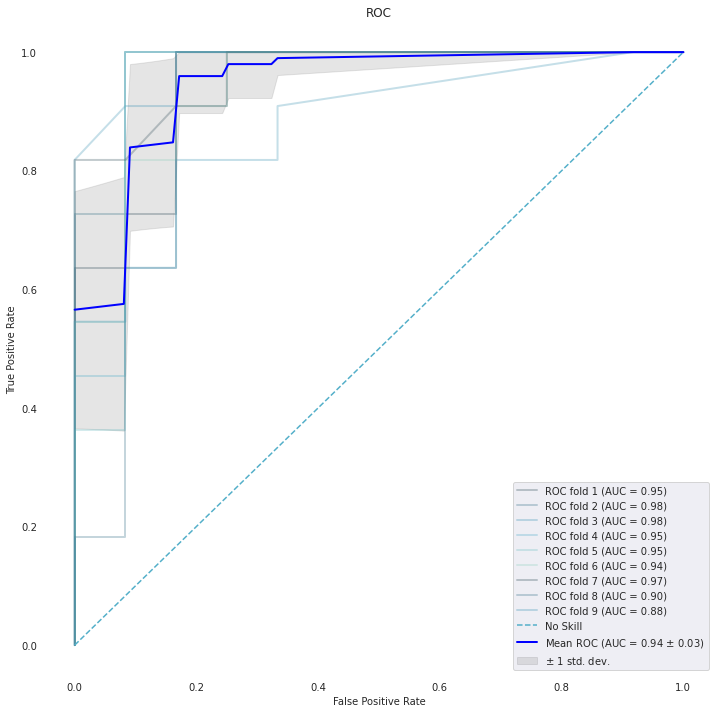

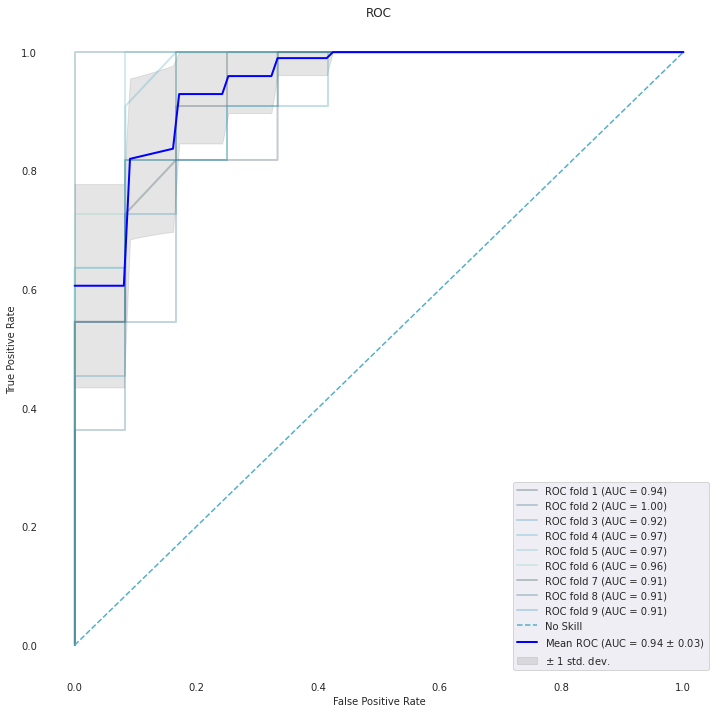

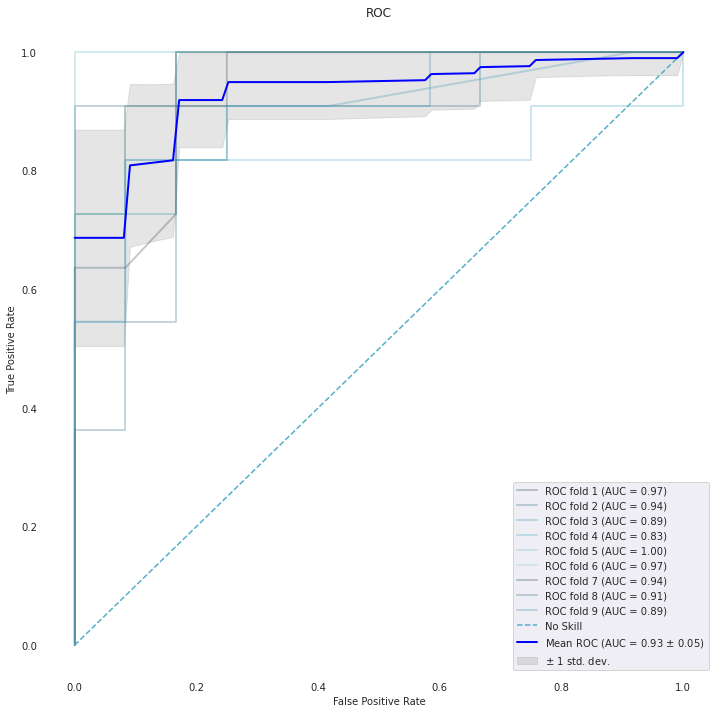

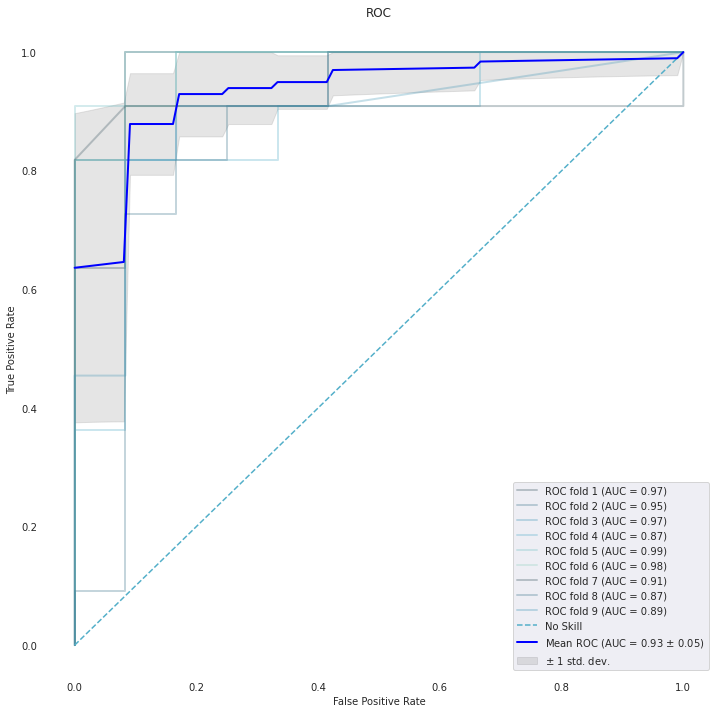

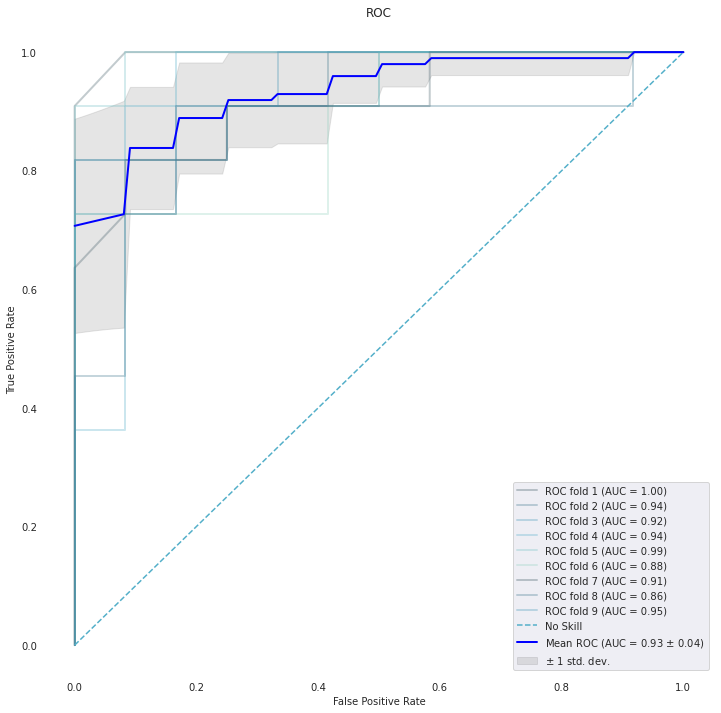

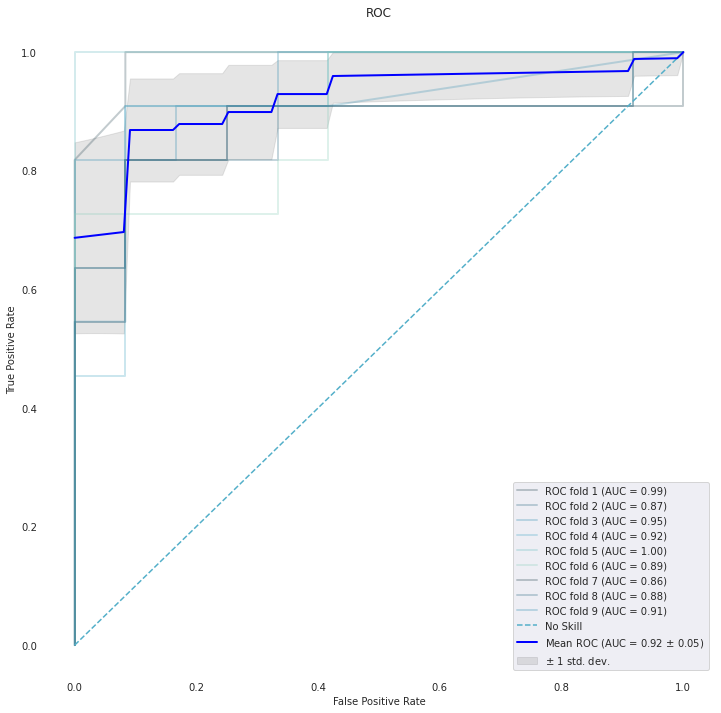

In [125]:
def create_atom(solver, model):
    atom = ATOMClassifier(X, y="y", test_size=0.25, verbose=2, warnings=False, random_state = 1, index=True)

    for i in range(3,10):
        atom.branch = "sfmXGB_sfs" + solver + "_" + str(i) + "_from_master"
        atom.feature_selection(strategy="SFM", solver="XGB", n_features=10, random_state=0)
        atom.feature_selection(strategy="SFS", solver=solver, n_features=i, random_state=0, direction = "backward")
        
        models_named = model + "_" + str(i)
        atom.run(models=[models_named], n_calls=50, n_initial_points=10, metric="AUC", n_bootstrap=5)

        atom.save("atom_sfmXGB_sfs" + solver + "_" + model + "_600_BC", save_data=False)
    return atom

def create_avg_auc(branch, atom, model):
    atom.branch = branch
    fig = plt.figure(figsize=[12,12])
    ax = fig.add_subplot(111)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)

    for x in range(1,10):
        print(x)
        atom_2 = ATOMClassifier(atom.X, y=atom.y, test_size=0.25, verbose=2, warnings=False, random_state = x)
        atom_2.run(models=[model], 
            n_calls=50,
            n_initial_points=10,
            metric="AUC",
            n_bootstrap=5)

        # keep probabilities for the positive outcome only
        yhat = atom_2.winner.predict_proba_test[:, 1]
        # calculate roc curves
        fpr, tpr, threshold = roc_curve(atom_2.y_test, yhat)
        tprs.append(interp(mean_fpr, fpr, tpr)) 
        auc_score = roc_auc_score(atom_2.y_test, yhat)
        aucs.append(auc_score)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (x, auc_score))

    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, lw=2, alpha=1, color='blue', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

    std_tpr = np.std(tprs, axis=0)
    tprs_lower = mean_tpr - std_tpr
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color="grey", alpha=0.2, label=r"$\pm$ 1 std. dev.",)

    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC')
    ax.legend()
    ax.set_facecolor('w')
    #plt.show()
    n_features = atom.X.shape[1]
    name = "roc_" + model + "_2step_" + str(n_features) + "f.pdf"
    plt.savefig(name, transparent= True)
    return n_features, mean_auc, std_auc


solver = "LGB"
model = "AdaB"
atom = create_atom(solver, model)

branches = ["sfmXGB_sfs" + solver + "_" + str(i) for i in range(3,10)]
path = "roc_" + model + "_results_2step.txt"
for branch in branches:
    n, mean_auc, std_auc = create_avg_auc(branch, atom, model)
    with open(path, "a") as file:
        file.write(f"{n}, {mean_auc}, {std_auc}\n")

AdaB with 4 features results with the highest average auc.

This model was trained with 2 steps of feature selection:

SFM with XGB solver (600 features to 10)

SFS with LGB solver (10 features to 4)

In [142]:
atom = ATOMLoader("atom_sfmXGB_sfsLGB_AdaB_600_BC", data = (X,"y")) 
atom.branch = "master"

Transforming data for branch sfmXGB_sfsLGB_3:
Performing feature selection ...
 --> The XGBClassifier estimator selected 10 features from the dataset.
   >>> Dropping feature CVVSDRGSTLGRLYF.
   >>> Dropping feature CAVNQAGTALIF.
   >>> Dropping feature CAVNTGNQFYF.
   >>> Dropping feature CAVMDSSYKLIF.
   >>> Dropping feature CAVNTGFQKLVF.
   >>> Dropping feature CAENSGGSNYKLTF.
   >>> Dropping feature CAVNDYKLSF.
   >>> Dropping feature CAVMDSNYQLIW.
   >>> Dropping feature CAVSGGSNYKLTF.
   >>> Dropping feature CAVNTNAGKSTF.
   >>> Dropping feature CAANFGNEKLTF.
   >>> Dropping feature CAVNTGGFKTIF.
   >>> Dropping feature CAVSNDYKLSF.
   >>> Dropping feature CAVTGNQFYF.
   >>> Dropping feature CAAMDSNYQLIW.
   >>> Dropping feature CAVKDSNYQLIW.
   >>> Dropping feature CAVNSGGSNYKLTF.
   >>> Dropping feature CAENTGGFKTIF.
   >>> Dropping feature CAVLDSNYQLIW.
   >>> Dropping feature CAVNSGGYQKVTF.
   >>> Dropping feature CAVPNQAGTALIF.
   >>> Dropping feature CAVTDSNYQLIW.
   >>> Dr

In [126]:
atom.branch = "sfmXGB_sfsLGB_4"

Switched to branch sfmXGB_sfsLGB_4.


In [127]:
atom.features

['CAVRDSNYQLIW', 'CADHQNYGGSQGNLIF', 'CALQGGSEKLVF', 'CAVLTGTASKLTF']

In [150]:
atom.AdaB_4.best_params

{'n_estimators': 173, 'learning_rate': 0.0151, 'algorithm': 'SAMME'}

In [148]:
# keep probabilities for the positive outcome only
yhat = atom.AdaB_4.predict_proba_test[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(atom.y_test, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print(f'Best Threshold={best_thresh:.3f}')

roc_auc = auc(fpr, tpr)
print(f'ROC AUC = {roc_auc:.3f}')

Best Threshold=0.451
ROC AUC = 0.905


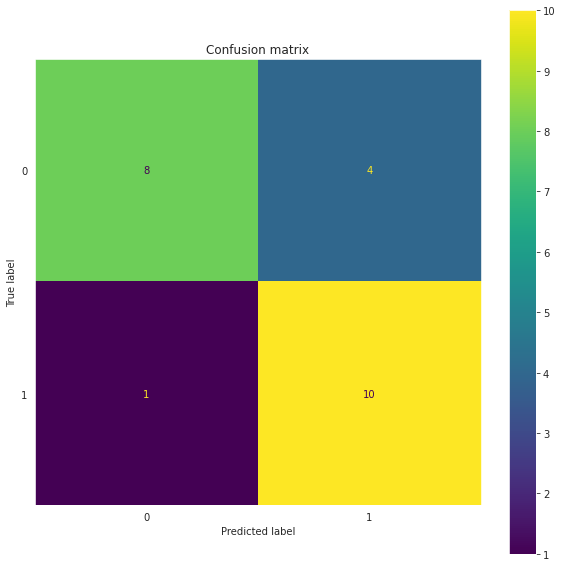

In [149]:
y_pred = (yhat > best_thresh).astype('float')
cm = confusion_matrix(atom.y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='horizontal')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.grid(False)
plt.title('Confusion matrix')

#plt.savefig("cm_testset_4f.pdf", transparent= True)
plt.show()